<center><h1>Assignment 2</h1></center>


## Generic environment setup

In [3]:
# assignment main dependencies
import warnings # to suppress warning messages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline

In [4]:
# to ignore warnings in the notebook
# warnings.filterwarnings('ignore')

In [5]:
# matplotlib plotting config
%matplotlib inline

In [6]:
# ANSI escape sequences for text formatting
BOLD = '\033[1;3m'
RESET_FMT = '\033[0m'

def print_bold(s):
    print(f"{BOLD}{s}{RESET_FMT}")

## Data Preprocessing

First we read the CSV file at hand into a Pandas DataFrame, `df`, via the `read_csv()` method.

In [7]:
df = pd.read_csv("../OnlineNewsPopularity/OnlineNewsPopularity.csv")

In [8]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


We observe, that the DataFrame contains 60 + 1 features, of which the target variable is called `shares`. Next, we query descriptive statistics on the DataFrame by the `describe()` method.

In [9]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Above, we see that the number of columns dropped to 60. This is becuase the `describe()` method cannot do descriptive statistics on a nominal variable, `url`. 

Below, we learn about the data types of the features by printing out the `dtypes` attribute of the DataFrame.


In [10]:
# get data types of dataframe
print(df.dtypes)

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object


Because the URL link of a website is irrelevant for our model, we decided to drop this feature from the dataset.

In [11]:
# drop redundant feature
df = df.drop('url', axis=1)

We can see that all of our data are of type "float", except for the target variable Shares, which is an integer. We will get to the conversion of the target variable into a categorical variable later.


Inpsecting the OnlineNewsPopularity.names file, as well as the data types we have just printed, we see that this dataset has features that correspond to categorical measures, such as the data channel of the news article or the day on which the article was published. However, it is also noticable that dummy variables have already been created for both of these measures in the dataset. Regarding data channels, we find the "data_channel_is_..." variables, where each variable represent a certain data channel, such as "data_channel_is_lifestyle", or "data_channel_is_entertainment". We find a similar encoding for the weekdays, where dummies have already been created in the dataset, such as "weekday_is_monday" or "weekday_is_tuesday".

Next, we would like to convert our continuous target variable "Shares" into a categorical variable.

In [12]:
# convert target variable to binary
df[' shares'] = (df[' shares'] >= 1400).astype(int)

In [13]:
print(df[' shares'].value_counts(), '\n')
print(df[' shares'].describe())

1    21154
0    18490
Name:  shares, dtype: int64 

count    39644.000000
mean         0.533599
std          0.498876
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name:  shares, dtype: float64


Next, we create the target and feature DataFrames, by selecting the relevant columns of the data set.

In [14]:
# select target and feature column(s)
target_name = ' shares'
target = df[target_name]
feature = df.drop(target_name, axis=1)

## Models

In [23]:
# utility cell

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score


def populate_df(df, grid_search_obj, outcome):
    
    y_true, y_pred = outcome
    
    df.loc['Best parameter(s)', scl_name] = str(grid_search_obj.best_params_)
    df.loc['Best cross-validation score', scl_name] = round(grid_search_obj.best_score_, 6)
    df.loc['Best Training set score', scl_name] = round(grid_search_obj.score(X_train, y_train), 6)
    df.loc['Best Test set score', scl_name] = round(grid_search_obj.score(X_test, y_test), 6)
    
    df.loc['Accuracy', scl_name] = round(accuracy_score(y_true, y_pred), 6)
    df.loc['Macro-Averaged Precision', scl_name] = round(average_precision_score(y_true, y_pred, average='macro'), 6)
    df.loc['Micro-Averaged Precision', scl_name] = round(average_precision_score(y_true, y_pred, average='micro'), 6)
    df.loc['Recall', scl_name] = round(recall_score(y_true, y_pred), 6)
    df.loc['F1 Score', scl_name] = round(f1_score(y_true, y_pred), 6)
    
def print_metrics(outcome):
    y_true, y_pred = outcome
    print("Accuracy: {}".format(round(accuracy_score(y_true, y_pred), 6)))
    print("Macro-Averaged Precision: {}".format(round(average_precision_score(y_true, y_pred, average='macro'), 6)))
    print("Micro-Averaged Precision: {}".format(round(average_precision_score(y_true, y_pred, average='micro'), 6)))
    print("Recall: {}".format(round(recall_score(y_true, y_pred), 6)))
    print("F1 Score: {}".format(round(f1_score(y_true, y_pred), 6)))

Splitting the data into training set and test set

In [17]:
from sklearn.model_selection import train_test_split

# split data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=8)
print("trainig set size: {}\ntest set size: {}".format(y_train.shape[0], y_test.shape[0]))

trainig set size: 29733
test set size: 9911


### Decision Tree

#### Fitting the data

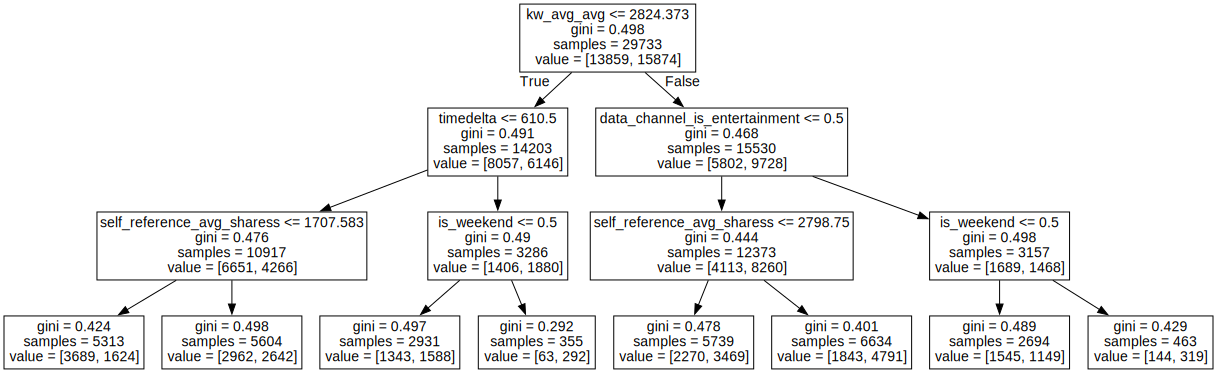

In [35]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=X_train.columns)
tree_predict = tree.predict(X_test)
graphviz.Source(tree_dot)

In [33]:
print_metrics((y_test, tree_predict))

Accuracy: 0.62244
Macro-Averaged Precision: 0.605128
Micro-Averaged Precision: 0.605128
Recall: 0.652462
F1 Score: 0.648044


50 words explanation.

#### GridSearchCV


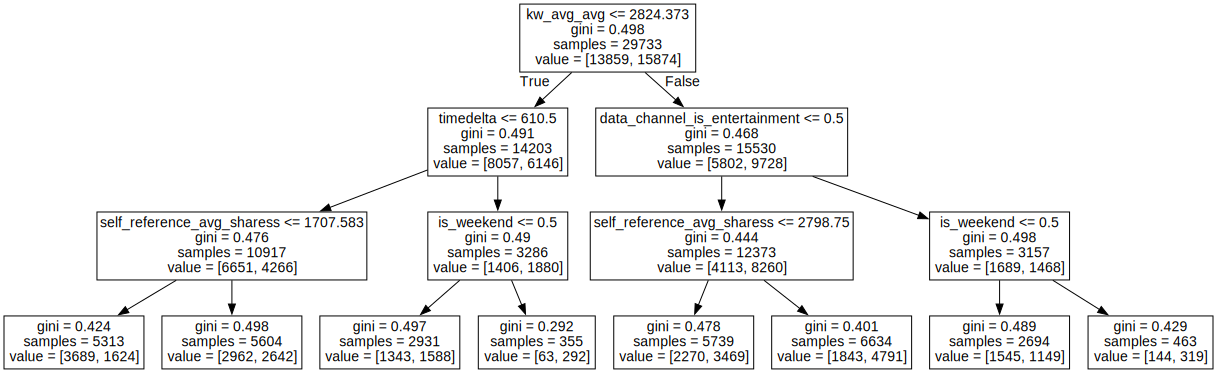

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

param_grid = {'max_depth':range(1, 4), 'max_features':range(1, 9)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=X_train.columns)
tree_predict = tree.predict(X_test)
graphviz.Source(tree_dot)

In [38]:
print_metrics((y_test, tree_predict))

Accuracy: 0.62244
Macro-Averaged Precision: 0.605128
Micro-Averaged Precision: 0.605128
Recall: 0.652462
F1 Score: 0.648044
